In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
train_df = pd.read_csv(r"C:\Users\Atehe Stephen\Downloads\Compressed\ai-bootcamp-2021\Train.csv")
test_df = pd.read_csv(r"C:\Users\Atehe Stephen\Downloads\Compressed\ai-bootcamp-2021\Test.csv")

In [3]:
print(f'The shape of the train set is {train_df.shape}')
print(f'The shape of the train set is {test_df.shape}')

The shape of the train set is (1568, 27)
The shape of the train set is (672, 26)


In [4]:
submission_file = pd.DataFrame(columns=['ID', 'Response'])
submission_file.ID = test_df.ID
submission_file.head()

,ID,Response
0,ID_ZPMABNVX,NaN
1,ID_WFE91NAA,NaN
2,ID_JV11RBRK,NaN
3,ID_6B7SVKY9,NaN
4,ID_GOVUZ545,NaN


In [5]:
test_df.isna().sum()

ID                         0
Year_of_Birth              0
Education_Level            0
Marital_Status             0
Disposable_Income          8
No_of_Kids_in_home         0
No_of_Teen_in_home         0
Date_Customer              0
Recency                    0
Discounted_Purchases       0
WebPurchases               0
CatalogPurchases           0
StorePurchases             0
Amount_on_Wines            0
Amount_on_Fruits           0
Amount_on_MeatProducts     0
Amount_on_FishProducts     0
Amount_on_SweetProducts    0
Amount_on_GoldProds        0
WebVisitsMonth             0
Cmp3Accepted               0
Cmp4Accepted               0
Cmp5Accepted               0
Cmp1Accepted               0
Cmp2Accepted               0
Any_Complain               0
dtype: int64

In [6]:
# Replacing NA values with mean
dataset = (test_df, train_df)
for data in dataset:
    data['Disposable_Income'].fillna(data['Disposable_Income'].mean(),inplace=True)
    data.drop('ID', axis=1, inplace=True)

In [7]:
test_df.isna().sum()

Year_of_Birth              0
Education_Level            0
Marital_Status             0
Disposable_Income          0
No_of_Kids_in_home         0
No_of_Teen_in_home         0
Date_Customer              0
Recency                    0
Discounted_Purchases       0
WebPurchases               0
CatalogPurchases           0
StorePurchases             0
Amount_on_Wines            0
Amount_on_Fruits           0
Amount_on_MeatProducts     0
Amount_on_FishProducts     0
Amount_on_SweetProducts    0
Amount_on_GoldProds        0
WebVisitsMonth             0
Cmp3Accepted               0
Cmp4Accepted               0
Cmp5Accepted               0
Cmp1Accepted               0
Cmp2Accepted               0
Any_Complain               0
dtype: int64

In [8]:
train_df.dtypes

Year_of_Birth                int64
Education_Level             object
Marital_Status              object
Disposable_Income          float64
No_of_Kids_in_home           int64
No_of_Teen_in_home           int64
Date_Customer               object
Recency                      int64
Discounted_Purchases         int64
WebPurchases                 int64
CatalogPurchases             int64
StorePurchases               int64
Amount_on_Wines              int64
Amount_on_Fruits             int64
Amount_on_MeatProducts       int64
Amount_on_FishProducts       int64
Amount_on_SweetProducts      int64
Amount_on_GoldProds          int64
WebVisitsMonth               int64
Cmp3Accepted                 int64
Cmp4Accepted                 int64
Cmp5Accepted                 int64
Cmp1Accepted                 int64
Cmp2Accepted                 int64
Any_Complain                 int64
Response                     int64
dtype: object

In [9]:
test_df.dtypes

Year_of_Birth                int64
Education_Level             object
Marital_Status              object
Disposable_Income          float64
No_of_Kids_in_home           int64
No_of_Teen_in_home           int64
Date_Customer               object
Recency                      int64
Discounted_Purchases         int64
WebPurchases                 int64
CatalogPurchases             int64
StorePurchases               int64
Amount_on_Wines              int64
Amount_on_Fruits             int64
Amount_on_MeatProducts       int64
Amount_on_FishProducts       int64
Amount_on_SweetProducts      int64
Amount_on_GoldProds          int64
WebVisitsMonth               int64
Cmp3Accepted                 int64
Cmp4Accepted                 int64
Cmp5Accepted                 int64
Cmp1Accepted                 int64
Cmp2Accepted                 int64
Any_Complain                 int64
dtype: object

In [10]:
train_df['Date_Customer'] = pd.to_datetime(train_df['Date_Customer'])
test_df['Date_Customer'] = pd.to_datetime(test_df['Date_Customer'])

In [11]:
categ_cols = train_df.select_dtypes(include=['object', 'category']).columns
num_col = [col for col in train_df.columns if col not in categ_cols ]

print(f'''Categorical columns: {categ_cols}
Numerical columns {num_col}''')

Categorical columns: Index(['Education_Level', 'Marital_Status'], dtype='object')
Numerical columns ['Year_of_Birth', 'Disposable_Income', 'No_of_Kids_in_home', 'No_of_Teen_in_home', 'Date_Customer', 'Recency', 'Discounted_Purchases', 'WebPurchases', 'CatalogPurchases', 'StorePurchases', 'Amount_on_Wines', 'Amount_on_Fruits', 'Amount_on_MeatProducts', 'Amount_on_FishProducts', 'Amount_on_SweetProducts', 'Amount_on_GoldProds', 'WebVisitsMonth', 'Cmp3Accepted', 'Cmp4Accepted', 'Cmp5Accepted', 'Cmp1Accepted', 'Cmp2Accepted', 'Any_Complain', 'Response']


In [12]:
train_df.describe()

,Year_of_Birth,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,...,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response
count,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,...,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000
mean,1970.073342,62381.186598,0.460459,0.497449,55.408801,2.292730,4.001276,2.665816,5.703444,303.190051,...,26.800383,43.739158,5.326531,0.072704,0.072704,0.080357,0.064413,0.012755,0.008291,0.152423
std,11.920781,31924.924495,0.540361,0.544151,28.788037,1.937544,2.773748,3.043493,3.260553,340.141396,...,40.857657,51.591557,2.468023,0.259733,0.259733,0.271932,0.245566,0.112252,0.090705,0.359546
min,1900.000000,2076.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1960.000000,41801.400000,0.000000,0.000000,31.000000,1.000000,2.000000,0.000000,3.000000,27.000000,...,1.000000,8.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1971.000000,61391.400000,0.000000,0.000000,56.000000,2.000000,3.000000,2.000000,5.000000,167.000000,...,8.000000,25.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1979.000000,81055.200000,1.000000,1.000000,80.000000,3.000000,6.000000,4.000000,8.000000,499.500000,...,33.000000,56.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1997.000000,799999.200000,2.000000,2.000000,106.000000,15.000000,27.000000,28.000000,13.000000,1498.000000,...,263.000000,362.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## VISUALIZATION

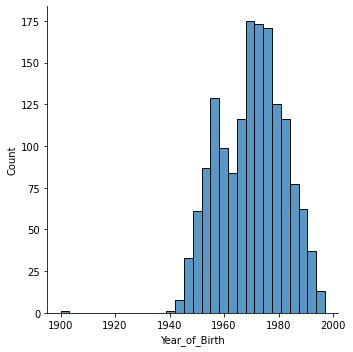

In [13]:
sns.displot(x=train_df['Year_of_Birth'],  data = train_df)

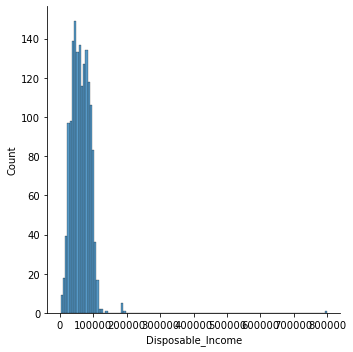

In [14]:
sns.displot(x=train_df['Disposable_Income'],  data = train_df)

<AxesSubplot:xlabel='Response', ylabel='count'>

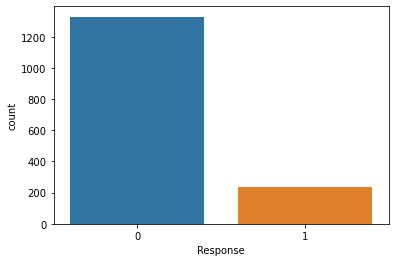

In [15]:
sns.countplot(x='Response', data=train_df)

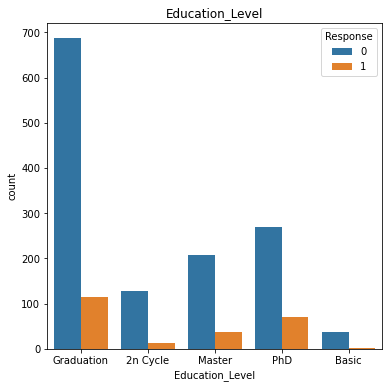

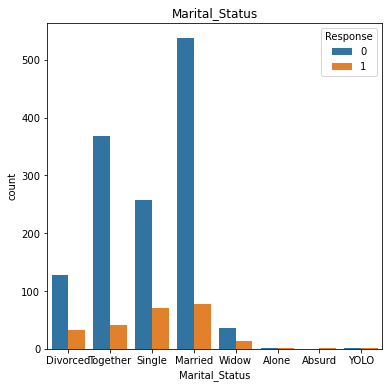

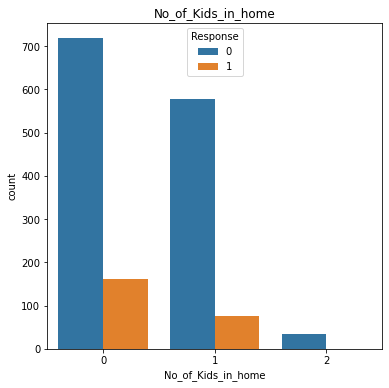

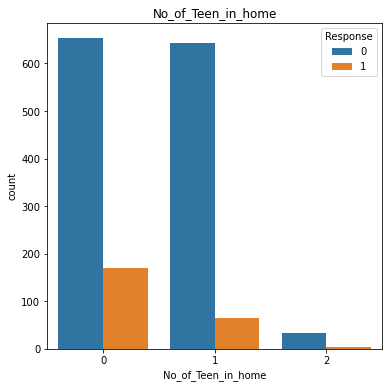

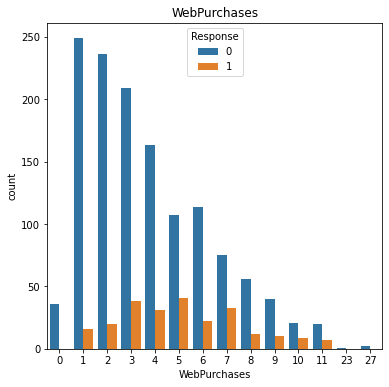

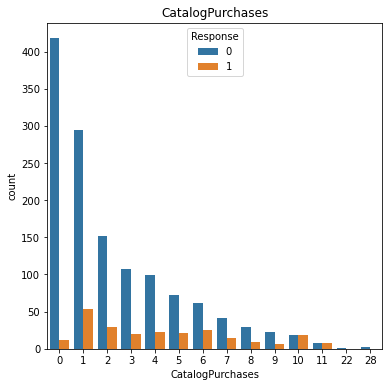

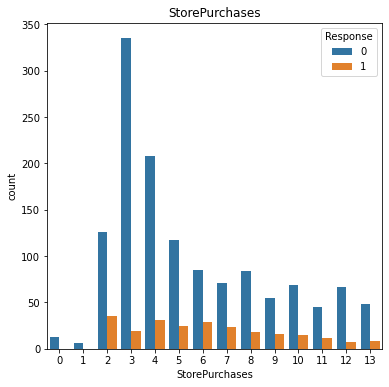

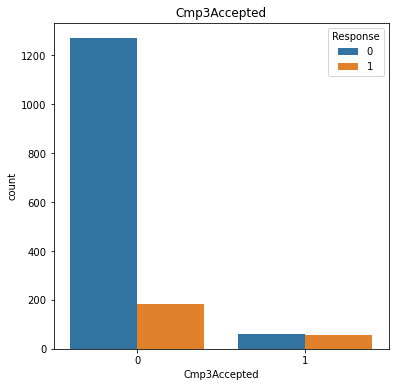

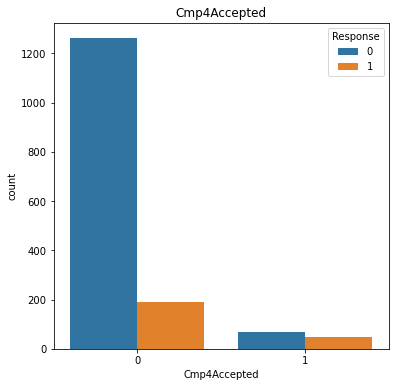

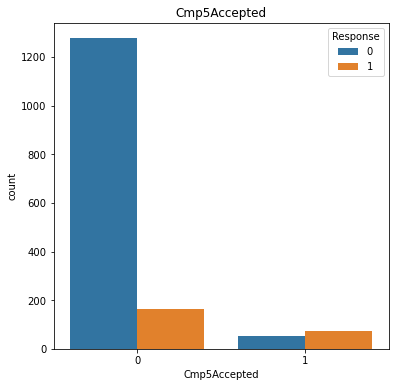

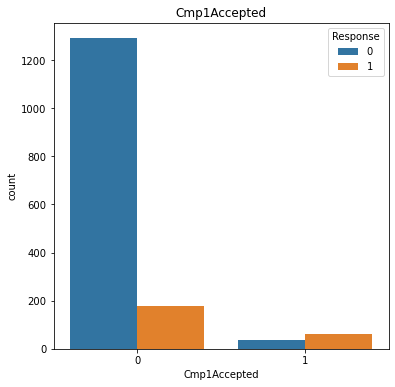

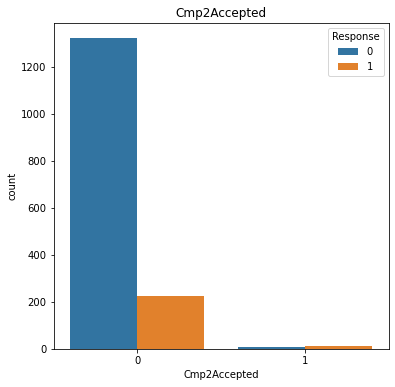

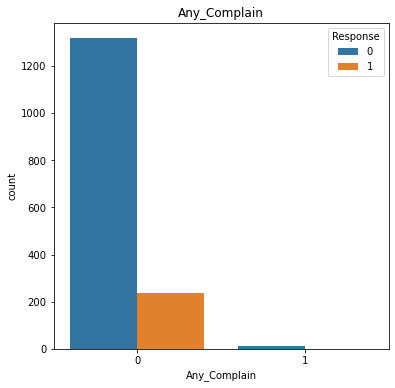

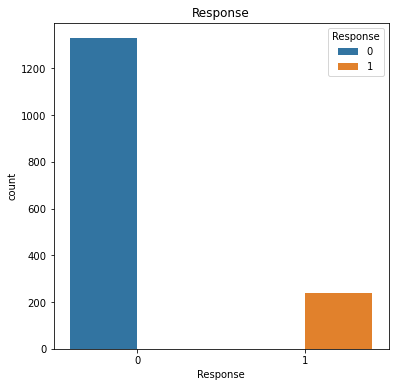

In [16]:
def plot_count(data, cols, legend=None):
    for col in cols:
        if len(data[col].unique()) < 15:
            fig = plt.figure(figsize=(6,6))
            ax = fig.gca()
            sns.countplot(x=col, hue=legend, data=data)
            ax.set_title(col)
            plt.show()

plot_count(train_df, train_df.columns, 'Response')

<AxesSubplot:xlabel='Education_Level,Marital_Status'>

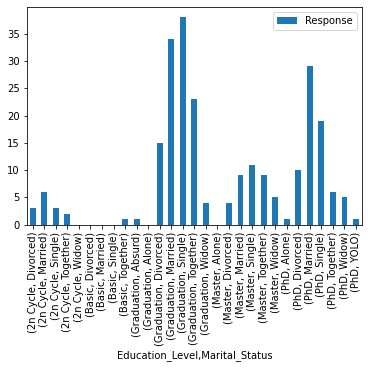

In [17]:
train_df[['Education_Level','Marital_Status','Response']].groupby(['Education_Level','Marital_Status']).sum().plot.bar()

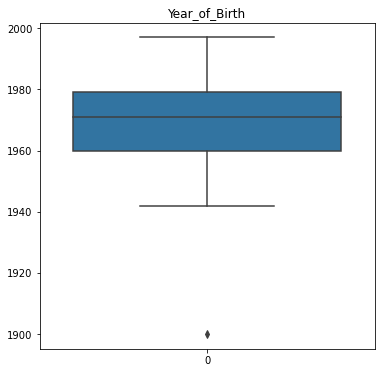

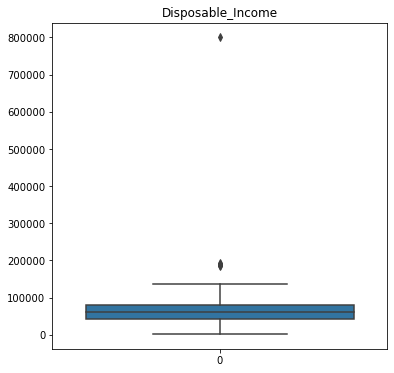

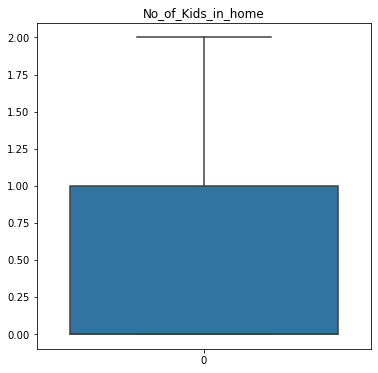

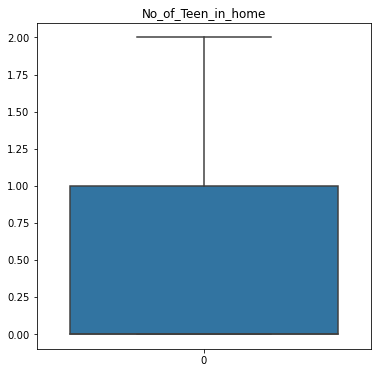

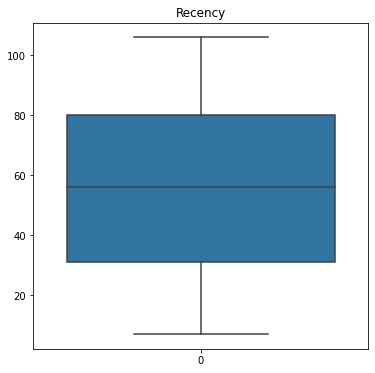

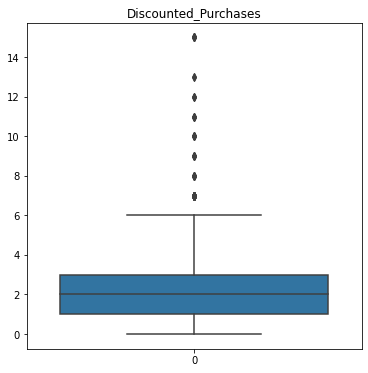

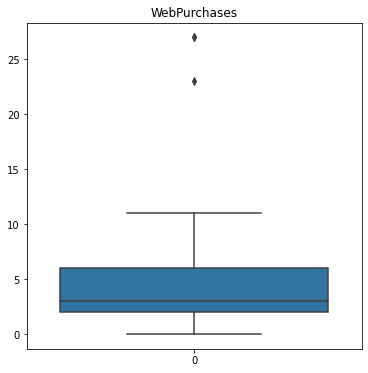

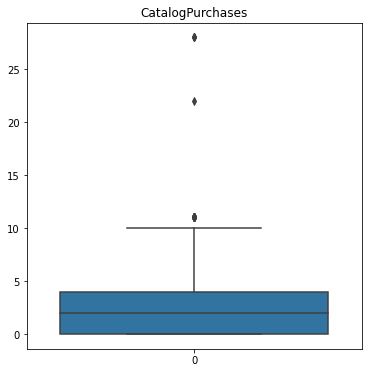

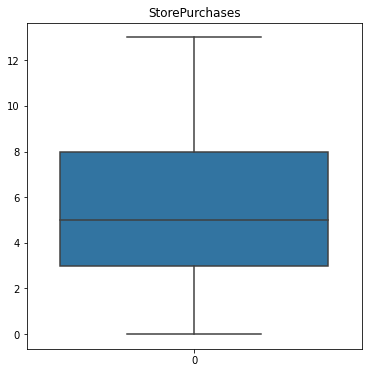

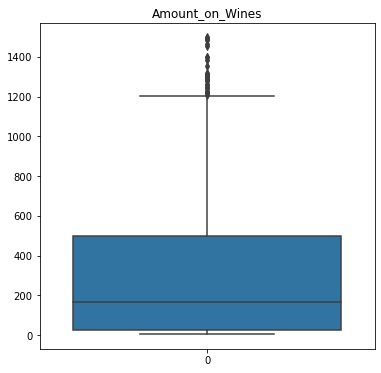

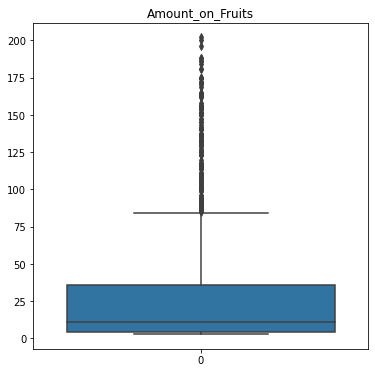

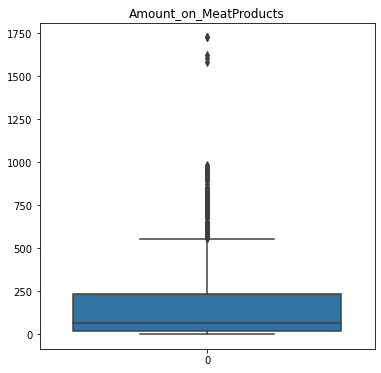

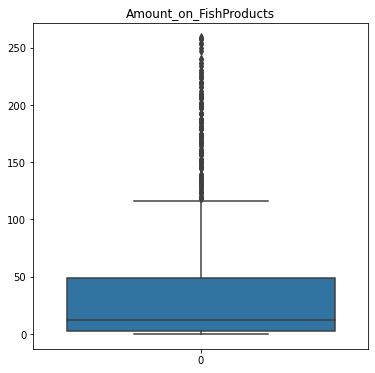

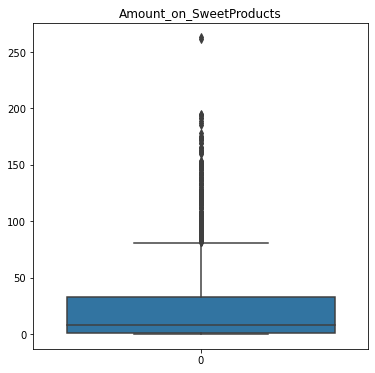

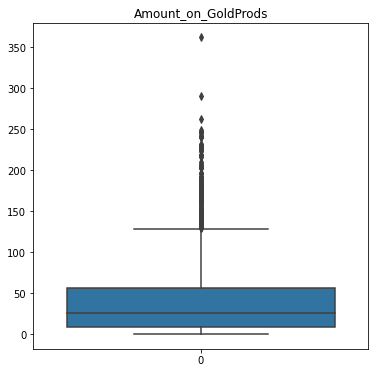

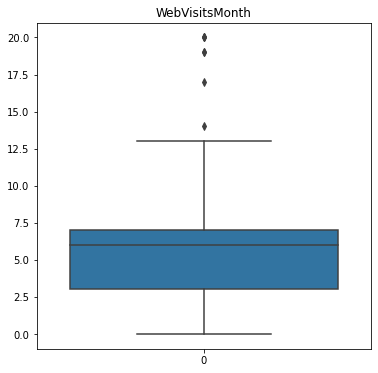

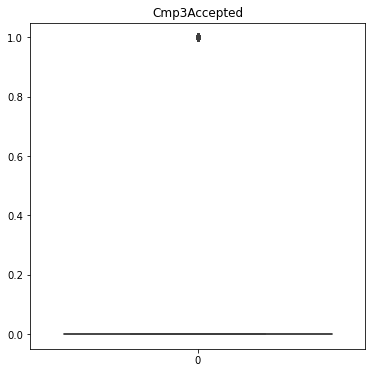

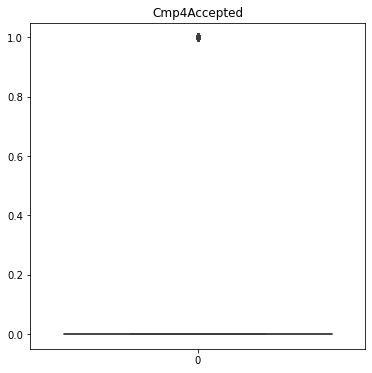

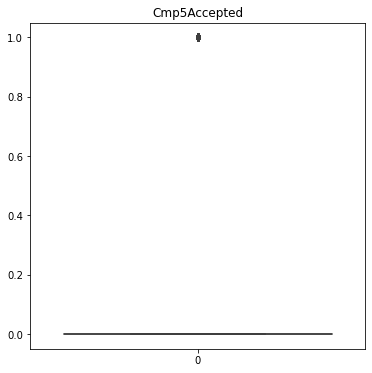

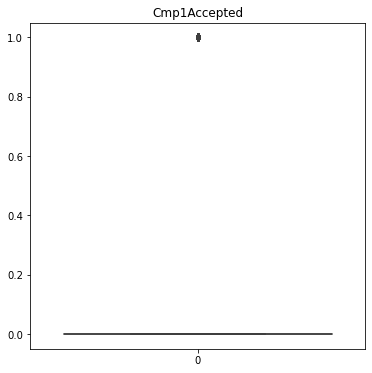

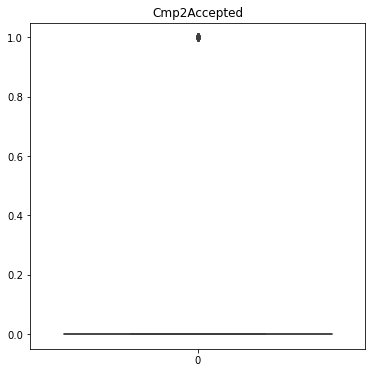

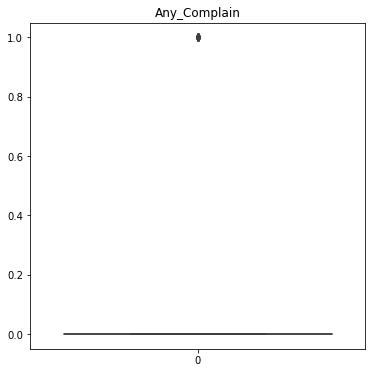

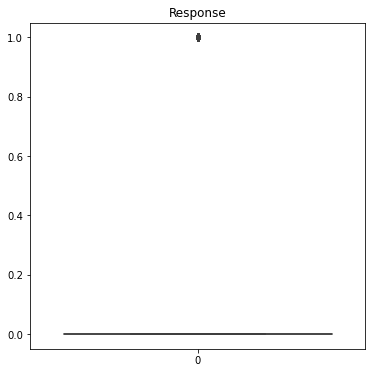

In [18]:
for col in train_df.describe().columns:
    
    fig = plt.figure(figsize=(6,6))
    ax = fig.gca()
    sns.boxplot(data=train_df[col])
    ax.set_title(col)
    plt.show()
    

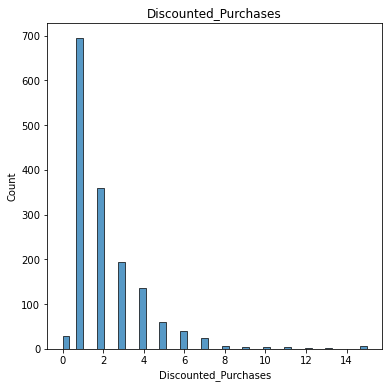

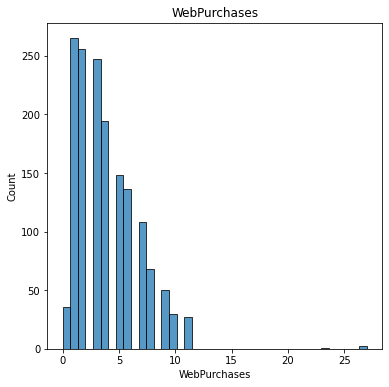

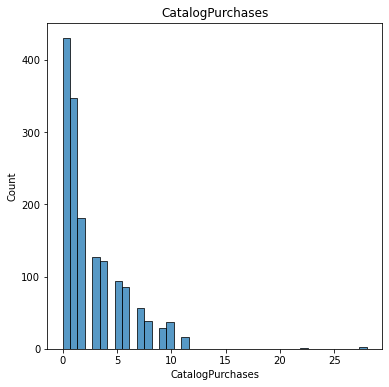

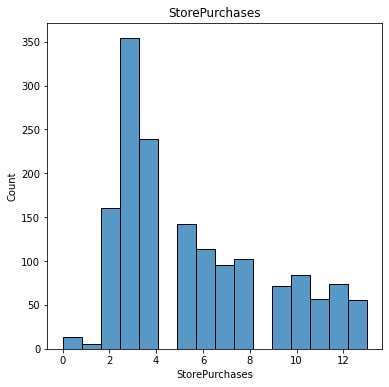

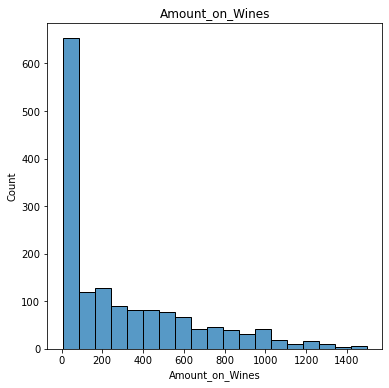

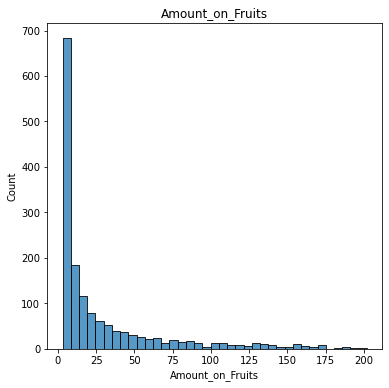

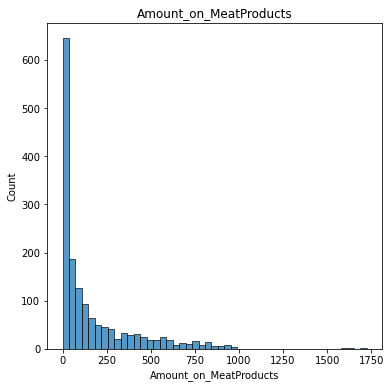

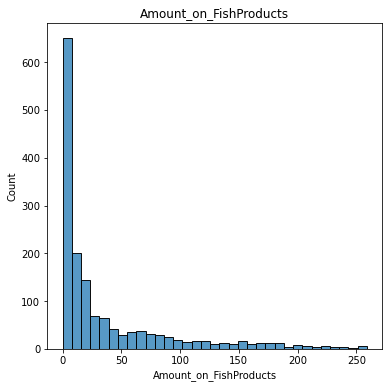

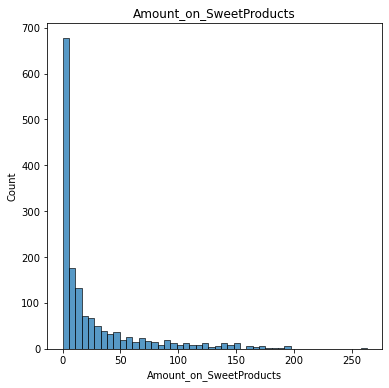

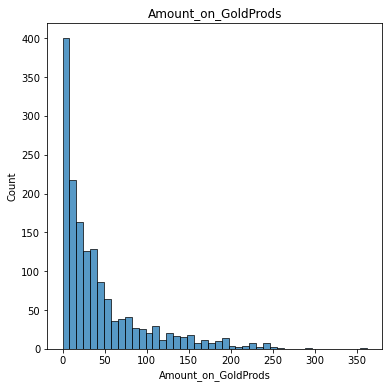

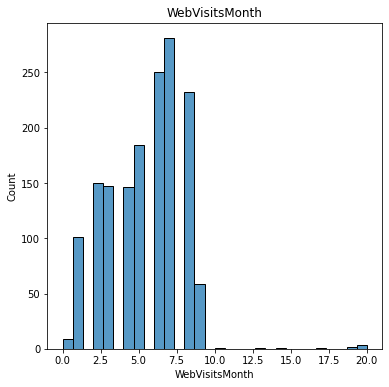

In [19]:
cols = ['Discounted_Purchases', 'WebPurchases', 'CatalogPurchases',
       'StorePurchases', 'Amount_on_Wines', 'Amount_on_Fruits',
       'Amount_on_MeatProducts', 'Amount_on_FishProducts',
       'Amount_on_SweetProducts', 'Amount_on_GoldProds', 'WebVisitsMonth']

for col in cols:
    fig = plt.figure(figsize=(6,6))
    ax = fig.gca()
    sns.histplot(train_df[col])
    ax.set_title(col)
    plt.show()

In [20]:
train_df

,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,WebPurchases,...,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response
0,1955,Graduation,Divorced,77504.4,1,1,2014-06-22,56,2,1,...,6,20,3,0,0,0,0,0,0,0
1,1958,Graduation,Together,56784.0,0,1,2013-01-08,17,6,5,...,15,19,6,0,0,0,0,0,0,0
2,1962,Graduation,Single,103714.8,0,0,2013-11-21,17,0,7,...,18,37,2,0,0,0,1,0,0,1
3,1979,2n Cycle,Single,46311.6,1,0,2013-09-13,49,3,4,...,24,24,8,0,0,0,0,0,0,0
4,1959,Graduation,Married,87486.0,0,0,2014-01-21,59,1,3,...,165,203,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1563,1970,Graduation,Married,52893.6,1,1,2014-06-19,24,2,2,...,0,4,5,0,0,0,0,0,0,0
1564,1980,Graduation,Single,74190.0,0,1,2013-07-08,63,1,4,...,30,27,4,0,0,0,0,0,0,0
1565,1952,Master,Married,80857.2,0,1,2013-01-15,74,4,2,...,0,70,7,0,1,0,0,0,0,0
1566,1964,PhD,Single,58701.6,1,1,2014-12-04,28,2,1,...,0,1,4,0,0,0,0,0,0,0


## FEATURE ENGINEERING

In [21]:
train_df.columns

Index(['Year_of_Birth', 'Education_Level', 'Marital_Status',
       'Disposable_Income', 'No_of_Kids_in_home', 'No_of_Teen_in_home',
       'Date_Customer', 'Recency', 'Discounted_Purchases', 'WebPurchases',
       'CatalogPurchases', 'StorePurchases', 'Amount_on_Wines',
       'Amount_on_Fruits', 'Amount_on_MeatProducts', 'Amount_on_FishProducts',
       'Amount_on_SweetProducts', 'Amount_on_GoldProds', 'WebVisitsMonth',
       'Cmp3Accepted', 'Cmp4Accepted', 'Cmp5Accepted', 'Cmp1Accepted',
       'Cmp2Accepted', 'Any_Complain', 'Response'],
      dtype='object')

In [22]:
train_df['Amount']=train_df['Amount_on_Wines']+train_df['Amount_on_Fruits']+train_df['Amount_on_MeatProducts']+train_df[ 'Amount_on_FishProducts']+train_df['Amount_on_SweetProducts']+train_df['Amount_on_GoldProds']

In [23]:
test_df['Amount']=test_df['Amount_on_Wines']+test_df['Amount_on_Fruits']+test_df['Amount_on_MeatProducts']+test_df[ 'Amount_on_FishProducts']+test_df['Amount_on_SweetProducts']+test_df['Amount_on_GoldProds']

In [24]:
train_df.drop(columns=['Amount_on_Wines',
       'Amount_on_Fruits', 'Amount_on_MeatProducts', 'Amount_on_FishProducts',
       'Amount_on_SweetProducts', 'Amount_on_GoldProds'], inplace=True)
test_df.drop(columns=['Amount_on_Wines',
       'Amount_on_Fruits', 'Amount_on_MeatProducts', 'Amount_on_FishProducts',
       'Amount_on_SweetProducts', 'Amount_on_GoldProds'], inplace=True)


In [25]:
train_df['Accepted_offers']=0
test_df['Accepted_offers']=0

accepted_cols = [  'Cmp3Accepted', 'Cmp4Accepted', 'Cmp5Accepted', 'Cmp1Accepted',
       'Cmp2Accepted']
for col in accepted_cols:
    train_df['Accepted_offers'] += train_df[col]
    test_df['Accepted_offers'] += test_df[col]


train_df

,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,WebPurchases,...,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response,Amount,Accepted_offers
0,1955,Graduation,Divorced,77504.4,1,1,2014-06-22,56,2,1,...,3,0,0,0,0,0,0,0,116,0
1,1958,Graduation,Together,56784.0,0,1,2013-01-08,17,6,5,...,6,0,0,0,0,0,0,0,422,0
2,1962,Graduation,Single,103714.8,0,0,2013-11-21,17,0,7,...,2,0,0,0,1,0,0,1,1457,1
3,1979,2n Cycle,Single,46311.6,1,0,2013-09-13,49,3,4,...,8,0,0,0,0,0,0,0,185,0
4,1959,Graduation,Married,87486.0,0,0,2014-01-21,59,1,3,...,1,0,0,0,1,0,0,0,1523,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1563,1970,Graduation,Married,52893.6,1,1,2014-06-19,24,2,2,...,5,0,0,0,0,0,0,0,49,0
1564,1980,Graduation,Single,74190.0,0,1,2013-07-08,63,1,4,...,4,0,0,0,0,0,0,0,432,0
1565,1952,Master,Married,80857.2,0,1,2013-01-15,74,4,2,...,7,0,1,0,0,0,0,0,965,1
1566,1964,PhD,Single,58701.6,1,1,2014-12-04,28,2,1,...,4,0,0,0,0,0,0,0,70,0


In [26]:
train_df.drop(columns=accepted_cols, inplace=True)
test_df.drop(columns=accepted_cols, inplace=True)

In [27]:
for data in dataset:
    data.loc[:,'Age'] = 2019 - data.loc[:,'Year_of_Birth']
    data.drop('Year_of_Birth', axis=1, inplace=True)
    

train_df.head()

,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,WebVisitsMonth,Any_Complain,Response,Amount,Accepted_offers,Age
0,Graduation,Divorced,77504.4,1,1,2014-06-22,56,2,1,1,4,3,0,0,116,0,64
1,Graduation,Together,56784.0,0,1,2013-01-08,17,6,5,1,8,6,0,0,422,0,61
2,Graduation,Single,103714.8,0,0,2013-11-21,17,0,7,4,7,2,0,1,1457,1,57
3,2n Cycle,Single,46311.6,1,0,2013-09-13,49,3,4,1,3,8,0,0,185,0,40
4,Graduation,Married,87486.0,0,0,2014-01-21,59,1,3,7,9,1,0,0,1523,1,60


In [28]:
 train_df=train_df[train_df['Age'] < 90]

In [29]:
# label = ['young', 'mature', 'old']
# bins =[20,40,60,80]
# train_df['Age'] = pd.cut(train_df['Age'], bins=bins, labels=label, include_lowest=True)
# test_df['Age'] = pd.cut(test_df['Age'], bins=bins, labels=label, include_lowest=True)

# train_df['Age'].replace({'young':0, 'mature':1, 'old':2}, inplace=True)  
# test_df['Age'].replace({'young':0, 'mature':1, 'old':2}, inplace=True)  


In [30]:
train_df=train_df[train_df['Disposable_Income'] < 170000]

In [31]:
train_df['Date_Customer'] = train_df['Date_Customer'].dt.to_period('D') - pd.to_datetime('2021-10-01').to_period('D')
test_df['Date_Customer'] = test_df['Date_Customer'].dt.to_period('D') - pd.to_datetime('2021-10-01').to_period('D')

In [32]:
from operator import attrgetter
 
train_df['Date_Customer'] = 0-train_df['Date_Customer'].apply(attrgetter('n'))
test_df['Date_Customer'] = 0-test_df['Date_Customer'].apply(attrgetter('n'))



In [33]:
train_df

,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,WebVisitsMonth,Any_Complain,Response,Amount,Accepted_offers,Age
0,Graduation,Divorced,77504.4,1,1,2658,56,2,1,1,4,3,0,0,116,0,64
1,Graduation,Together,56784.0,0,1,3188,17,6,5,1,8,6,0,0,422,0,61
2,Graduation,Single,103714.8,0,0,2871,17,0,7,4,7,2,0,1,1457,1,57
3,2n Cycle,Single,46311.6,1,0,2940,49,3,4,1,3,8,0,0,185,0,40
4,Graduation,Married,87486.0,0,0,2810,59,1,3,7,9,1,0,0,1523,1,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1563,Graduation,Married,52893.6,1,1,2661,24,2,2,0,3,5,0,0,49,0,49
1564,Graduation,Single,74190.0,0,1,3007,63,1,4,2,8,4,0,0,432,0,39
1565,Master,Married,80857.2,0,1,3181,74,4,2,2,9,7,0,0,965,1,67
1566,PhD,Single,58701.6,1,1,2493,28,2,1,0,4,4,0,0,70,0,55


In [34]:
train_df['chilldren'] = train_df['No_of_Teen_in_home'] + train_df['No_of_Kids_in_home']
test_df['chilldren'] = test_df['No_of_Teen_in_home'] + test_df['No_of_Kids_in_home']

In [35]:
train_df.replace(to_replace={'2n Cycle': 'Master','Basic':'Graduation'}, inplace=True)
test_df.replace(to_replace={'2n Cycle': 'Master','Basic':'Graduation'}, inplace=True)

train_df.replace(to_replace={'Divorced':'Alone', 'Married':'Together', 'Single':'Alone', 'Widow':'Alone',  'Absurd':'Together', 'YOLO':'Alone'}, inplace=True)
test_df.replace(to_replace={'Divorced':'Alone', 'Married':'Together', 'Single':'Alone', 'Widow':'Alone',  'Absurd':'Together', 'YOLO':'Alone'}, inplace=True)


In [36]:
train_df.drop(columns=['No_of_Kids_in_home','No_of_Teen_in_home'], inplace=True)
test_df.drop(columns=['No_of_Kids_in_home','No_of_Teen_in_home'], inplace=True)

train_df['Education_Level'].replace({'Graduation':0, 'Master':1, 'PhD':2}, inplace=True)  
test_df['Education_Level'].replace({'Graduation':0, 'Master':1, 'PhD':2}, inplace=True)

In [37]:
train_df

,Education_Level,Marital_Status,Disposable_Income,Date_Customer,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,WebVisitsMonth,Any_Complain,Response,Amount,Accepted_offers,Age,chilldren
0,0,Alone,77504.4,2658,56,2,1,1,4,3,0,0,116,0,64,2
1,0,Together,56784.0,3188,17,6,5,1,8,6,0,0,422,0,61,1
2,0,Alone,103714.8,2871,17,0,7,4,7,2,0,1,1457,1,57,0
3,1,Alone,46311.6,2940,49,3,4,1,3,8,0,0,185,0,40,1
4,0,Together,87486.0,2810,59,1,3,7,9,1,0,0,1523,1,60,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1563,0,Together,52893.6,2661,24,2,2,0,3,5,0,0,49,0,49,2
1564,0,Alone,74190.0,3007,63,1,4,2,8,4,0,0,432,0,39,1
1565,1,Together,80857.2,3181,74,4,2,2,9,7,0,0,965,1,67,1
1566,2,Alone,58701.6,2493,28,2,1,0,4,4,0,0,70,0,55,2


In [38]:
# train_df['Purchase'] =0
# test_df['Purchase'] = 0

# purchase_col = ['Discounted_Purchases', 'WebPurchases',
#        'CatalogPurchases', 'StorePurchases']
# for col in purchase_col:
#     train_df['Purchase'] += train_df[col]
#     test_df['Purchase'] += test_df[col]
#     train_df.drop(col,axis=1, inplace=True)
#     test_df.drop(col,axis=1, inplace=True)
    

In [39]:
# train_df['Amount'].plot.hist()

In [40]:
# np.seterr(divide = 'ignore')
# train_df['Amount'] = np.where(train_df['Amount']>0, np.log(train_df['Amount']), 0)

<AxesSubplot:>

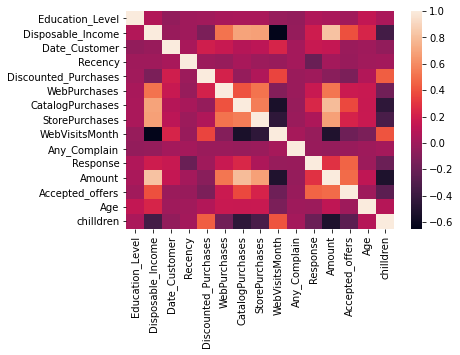

In [41]:
sns.heatmap(train_df.corr())

# MODELLING 

In [42]:
X = train_df.drop('Response', axis=1)
x_sub = test_df
y = train_df['Response']

In [43]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, RobustScaler, QuantileTransformer,StandardScaler
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import KFold,StratifiedKFold,GridSearchCV,RandomizedSearchCV, train_test_split, RepeatedStratifiedKFold 
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [44]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7645)

In [45]:
numerical_features = X.select_dtypes(include='number').columns.tolist()
categorical_features = X.select_dtypes(exclude='number').columns.tolist()

In [46]:
categorical_features

['Marital_Status']

In [47]:
numeric_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('scale', RobustScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('one-hot', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

In [48]:
from sklearn.compose import ColumnTransformer

full_processor = ColumnTransformer(transformers=[
    ('number', numeric_pipeline, numerical_features),
    ('category', categorical_pipeline, categorical_features)
    ])

#  full_processor.fit_transform()

In [49]:
X_proc = full_processor.fit_transform(X)
X_sub = full_processor.transform(x_sub)

X_train, X_test, y_train, y_test = train_test_split(
    X_proc, y, stratify=y, random_state=1121218)

smote = SMOTE(random_state=786)#786
X_smote, y_smote = smote.fit_resample(X_train, y_train)

### RANDOM FOREST

In [50]:
rf = RandomForestClassifier(random_state=235) #235
rf.fit(X_smote, y_smote)

y_rf = rf.predict(X_test)
f1_score(y_rf, y_test)

0.6371681415929203

In [51]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]


random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
random_grid

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'bootstrap': [True, False]}

In [52]:
param_grid = {'n_estimators': [100,200,300],
              'max_features': ['auto'],
              'max_depth': [10, 20, None],
              'min_samples_split': [2, 3,5],
              'min_samples_leaf': [1, 2, 4],
              'bootstrap': [ True]}

In [53]:
grid_rf= GridSearchCV(rf, param_grid, cv=3,scoring='f1')
grid_rf.fit(X_smote,y_smote)


y_grid_rf = grid_rf.predict(X_test)
f1_score(y_grid_rf, y_test)

KeyboardInterrupt: 

In [ ]:
grid_rf.best_params_


In [ ]:
param_grid = {'n_estimators': [700,800,900],
              'max_features': ['auto'],
              'max_depth': [None],
              'min_samples_split': [2],
              'min_samples_leaf': [1],
              'bootstrap': [ True]}

In [ ]:
grid_rf2= GridSearchCV(rf, param_grid, cv=3,scoring='f1')
grid_rf2.fit(X_smote,y_smote)


y_grid_rf2 = grid_rf2.predict(X_test)
f1_score(y_grid_rf2, y_test)

In [ ]:
grid_rf2.best_params_

In [ ]:
rf_final = RandomForestClassifier(**grid_rf2.best_params_)
rf_final.fit(X_smote,y_smote)


y_rf_final = rf_final.predict(X_test)
f1_score(y_rf_final, y_test)

In [ ]:
gg

### LOGISTIC REGRESSION

In [ ]:
log_reg = LogisticRegression(random_state=328)
log_reg.fit(X_train,y_train)

log_smote = LogisticRegression(random_state=908)
log_smote.fit(X_smote,y_smote)


In [ ]:
y_log = log_reg.predict(X_test)
f1_score(y_log,y_test)

In [ ]:
y_log_smote = log_smote.predict(X_test)
f1_score(y_log_smote,y_test)

In [ ]:
param_grid = {
              'max_iter':[100, 200, 300],
              'C':[1.0, 0.1, 0.01],
             }

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
grid_log = GridSearchCV(log_reg, param_grid, cv=cv , scoring='f1')
grid_log.fit(X_train,y_train)

y_grid_log = grid_log.predict(X_test)
f1_score(y_grid_log, y_test)

In [ ]:
grid_log.best_params_

In [ ]:
param_grid = {'max_iter':[300,500,700],
              'C':[0.1,10, 20, 50, 100],
            'penalty' :['l2'],
             }
grid_log2 = GridSearchCV(log_reg, param_grid, cv=3 , scoring='f1')
grid_log2.fit(X_train,y_train)

y_grid_log2 = grid_log2.predict(X_test)
f1_score(y_grid_log2, y_test)

In [ ]:
grid_log2.best_score_

In [ ]:
X_proc = full_processor.fit_transform(X)
X_sub = full_processor.transform(x_sub)

X_train, X_test, y_train, y_test = train_test_split(
    X_proc, y, stratify=y, random_state=1121218)

smote = SMOTE(random_state=786)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

### GRADIENT BOOSTING

In [ ]:
gb = GradientBoostingClassifier(max_depth=2, n_estimators=500, max_features='auto', loss='exponential', random_state=6)
gb.fit(X_smote, y_smote)



In [ ]:
y_gb = gb.predict(X_test)
f1_score(y_gb, y_test)

In [ ]:
param_grid = {

    "learning_rate": [0.1, 0.01, 0.05],
  
}

In [ ]:
grid_gb= GridSearchCV(gb, param_grid, cv=3,scoring='f1')
grid_gb.fit(X_train,y_train)


y_grid_gb = grid_gb.predict(X_test)
f1_score(y_grid_gb, y_test)

In [ ]:
grid_gb.best_score_

In [ ]:
grid_gb.best_params_

In [ ]:
param_grid = {
    "max_depth": [3],
    "n_estimators": [200],
    "max_features": ['log2'],
    "learning_rate": [0.1],
    "loss": ['deviance']
}

In [ ]:
grid_gb2 = GridSearchCV(gb, param_grid, cv=3,scoring='f1')
grid_gb2.fit(X_train,y_train)


y_grid_gb2= grid_gb2.predict(X_test)
f1_score(y_grid_gb2, y_test)

In [ ]:
grid_gb2.best_params_

In [ ]:
grid_gb2.best_score_

### XGBOOST

In [ ]:
import xgboost as xgb

In [ ]:
xgb = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(X_smote,y_smote)

y_xgp =  xgb.predict(X_test)
f1_score(y_xgp,y_test)

In [ ]:
param_grid = {
    "max_depth": [3, 4, 5, 7],
    "learning_rate": [0.1, 0.01, 0.05],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.8],
    "colsample_bytree": [0.5],
    "n_estimators":[10,20,30]
}

In [ ]:
grid_xgb= GridSearchCV(xgb, param_grid, cv=3,scoring='f1')
grid_xgb.fit(X_smote,y_smote)


In [ ]:
y_grid_xgb =  grid_xgb.predict(X_test)
f1_score(y_grid_xgb,y_test)


In [ ]:
grid_xgb.best_params_

In [ ]:
grid_xgb.best_score_

In [ ]:
pd.DataFrame(grid_xgb.cv_results_).sort_values

In [ ]:
param_grid = {
    "max_depth": [10,11,12],
    "learning_rate": [0.05],
    "gamma": [0.25],
    "reg_lambda": [0],
    "scale_pos_weight": [1],
    "subsample": [0.8],
    "colsample_bytree": [0.5],
}

In [ ]:
grid_xgb2= GridSearchCV(xgb, param_grid, cv=3, scoring='f1')
grid_xgb2.fit(X_smote,y_smote)


In [ ]:
y_grid_xgb2=grid_xgb2.predict(X_test)
f1_score(y_grid_xgb2,y_test)


In [ ]:
grid_xgb2.best_params_

In [ ]:
grid_xgb2.best_score_

In [ ]:
import xgboost as xgb

In [ ]:
final_xgb = xgb.XGBClassifier(**grid_xgb.best_params_, use_label_encoder=False, eval_metric='mlogloss')



In [ ]:
final_xgb.fit(X_train,y_train)
y_fxgb = final_xgb.predict(X_test)
f1_score(y_fxgb, y_test)

### CAT BOOST

In [61]:
import lightgbm as lgb  
from catboost import CatBoostClassifier
from sklearn.metrics import f1_score

cat_mod=CatBoostClassifier(random_state=100)



In [62]:
cat_mod.fit(X_smote, y_smote, use_best_model=True,)

y_cat=cat_mod.predict(X_test,)


print("Catboost F1 score on validation set is : ",f1_score(y_test,y_cat))


You should provide test set for use best model. use_best_model parameter has been switched to false value.


Learning rate set to 0.013797
0:	learn: 0.6814789	total: 149ms	remaining: 2m 28s
1:	learn: 0.6723450	total: 155ms	remaining: 1m 17s
2:	learn: 0.6631072	total: 162ms	remaining: 53.7s
3:	learn: 0.6560748	total: 168ms	remaining: 41.8s
4:	learn: 0.6469740	total: 174ms	remaining: 34.7s
5:	learn: 0.6385356	total: 180ms	remaining: 29.9s
6:	learn: 0.6306359	total: 186ms	remaining: 26.4s
7:	learn: 0.6212124	total: 193ms	remaining: 24s
8:	learn: 0.6127969	total: 200ms	remaining: 22s
9:	learn: 0.6068325	total: 206ms	remaining: 20.4s
10:	learn: 0.5994361	total: 213ms	remaining: 19.1s
11:	learn: 0.5929055	total: 219ms	remaining: 18s
12:	learn: 0.5852893	total: 225ms	remaining: 17.1s
13:	learn: 0.5779506	total: 232ms	remaining: 16.3s
14:	learn: 0.5718965	total: 239ms	remaining: 15.7s
15:	learn: 0.5650910	total: 245ms	remaining: 15.1s
16:	learn: 0.5589495	total: 251ms	remaining: 14.5s
17:	learn: 0.5524263	total: 257ms	remaining: 14s
18:	learn: 0.5459401	total: 264ms	remaining: 13.6s
19:	learn: 0.5406

173:	learn: 0.2450107	total: 1.12s	remaining: 5.3s
174:	learn: 0.2443698	total: 1.12s	remaining: 5.29s
175:	learn: 0.2437121	total: 1.13s	remaining: 5.28s
176:	learn: 0.2430262	total: 1.13s	remaining: 5.27s
177:	learn: 0.2422515	total: 1.14s	remaining: 5.26s
178:	learn: 0.2414788	total: 1.15s	remaining: 5.26s
179:	learn: 0.2406392	total: 1.15s	remaining: 5.25s
180:	learn: 0.2401151	total: 1.16s	remaining: 5.24s
181:	learn: 0.2392461	total: 1.16s	remaining: 5.23s
182:	learn: 0.2383621	total: 1.17s	remaining: 5.22s
183:	learn: 0.2375945	total: 1.17s	remaining: 5.21s
184:	learn: 0.2369714	total: 1.18s	remaining: 5.2s
185:	learn: 0.2362693	total: 1.19s	remaining: 5.19s
186:	learn: 0.2356961	total: 1.19s	remaining: 5.18s
187:	learn: 0.2350441	total: 1.2s	remaining: 5.17s
188:	learn: 0.2345828	total: 1.2s	remaining: 5.16s
189:	learn: 0.2341175	total: 1.21s	remaining: 5.15s
190:	learn: 0.2336165	total: 1.21s	remaining: 5.14s
191:	learn: 0.2331647	total: 1.22s	remaining: 5.13s
192:	learn: 0.23

362:	learn: 0.1579075	total: 2.18s	remaining: 3.83s
363:	learn: 0.1574791	total: 2.19s	remaining: 3.82s
364:	learn: 0.1572703	total: 2.19s	remaining: 3.82s
365:	learn: 0.1569673	total: 2.2s	remaining: 3.81s
366:	learn: 0.1566730	total: 2.21s	remaining: 3.8s
367:	learn: 0.1563124	total: 2.21s	remaining: 3.8s
368:	learn: 0.1561014	total: 2.22s	remaining: 3.79s
369:	learn: 0.1557764	total: 2.22s	remaining: 3.78s
370:	learn: 0.1554509	total: 2.23s	remaining: 3.78s
371:	learn: 0.1550824	total: 2.23s	remaining: 3.77s
372:	learn: 0.1548753	total: 2.24s	remaining: 3.76s
373:	learn: 0.1544477	total: 2.24s	remaining: 3.75s
374:	learn: 0.1542029	total: 2.25s	remaining: 3.75s
375:	learn: 0.1538393	total: 2.25s	remaining: 3.74s
376:	learn: 0.1536215	total: 2.26s	remaining: 3.73s
377:	learn: 0.1532787	total: 2.26s	remaining: 3.73s
378:	learn: 0.1529951	total: 2.27s	remaining: 3.72s
379:	learn: 0.1527654	total: 2.27s	remaining: 3.71s
380:	learn: 0.1523654	total: 2.28s	remaining: 3.7s
381:	learn: 0.15

539:	learn: 0.1164628	total: 3.1s	remaining: 2.64s
540:	learn: 0.1163087	total: 3.11s	remaining: 2.64s
541:	learn: 0.1161132	total: 3.12s	remaining: 2.63s
542:	learn: 0.1159601	total: 3.12s	remaining: 2.63s
543:	learn: 0.1158123	total: 3.13s	remaining: 2.62s
544:	learn: 0.1156444	total: 3.13s	remaining: 2.61s
545:	learn: 0.1154957	total: 3.14s	remaining: 2.61s
546:	learn: 0.1151591	total: 3.14s	remaining: 2.6s
547:	learn: 0.1150727	total: 3.15s	remaining: 2.6s
548:	learn: 0.1149126	total: 3.15s	remaining: 2.59s
549:	learn: 0.1147058	total: 3.16s	remaining: 2.58s
550:	learn: 0.1144441	total: 3.17s	remaining: 2.58s
551:	learn: 0.1142911	total: 3.17s	remaining: 2.57s
552:	learn: 0.1140288	total: 3.18s	remaining: 2.57s
553:	learn: 0.1138459	total: 3.18s	remaining: 2.56s
554:	learn: 0.1136669	total: 3.19s	remaining: 2.56s
555:	learn: 0.1134018	total: 3.19s	remaining: 2.55s
556:	learn: 0.1133371	total: 3.2s	remaining: 2.54s
557:	learn: 0.1130857	total: 3.2s	remaining: 2.54s
558:	learn: 0.112

717:	learn: 0.0884145	total: 4s	remaining: 1.57s
718:	learn: 0.0883532	total: 4s	remaining: 1.56s
719:	learn: 0.0881939	total: 4.01s	remaining: 1.56s
720:	learn: 0.0880372	total: 4.01s	remaining: 1.55s
721:	learn: 0.0878985	total: 4.02s	remaining: 1.55s
722:	learn: 0.0877252	total: 4.02s	remaining: 1.54s
723:	learn: 0.0875540	total: 4.03s	remaining: 1.53s
724:	learn: 0.0874191	total: 4.03s	remaining: 1.53s
725:	learn: 0.0872495	total: 4.04s	remaining: 1.52s
726:	learn: 0.0871699	total: 4.04s	remaining: 1.52s
727:	learn: 0.0870657	total: 4.04s	remaining: 1.51s
728:	learn: 0.0869281	total: 4.05s	remaining: 1.5s
729:	learn: 0.0868057	total: 4.05s	remaining: 1.5s
730:	learn: 0.0866199	total: 4.06s	remaining: 1.49s
731:	learn: 0.0865818	total: 4.06s	remaining: 1.49s
732:	learn: 0.0864452	total: 4.07s	remaining: 1.48s
733:	learn: 0.0863770	total: 4.07s	remaining: 1.48s
734:	learn: 0.0862092	total: 4.08s	remaining: 1.47s
735:	learn: 0.0860877	total: 4.08s	remaining: 1.47s
736:	learn: 0.085915

908:	learn: 0.0677674	total: 4.93s	remaining: 493ms
909:	learn: 0.0676607	total: 4.93s	remaining: 488ms
910:	learn: 0.0675119	total: 4.94s	remaining: 482ms
911:	learn: 0.0674595	total: 4.94s	remaining: 477ms
912:	learn: 0.0673674	total: 4.95s	remaining: 471ms
913:	learn: 0.0672435	total: 4.95s	remaining: 466ms
914:	learn: 0.0671298	total: 4.96s	remaining: 461ms
915:	learn: 0.0670478	total: 4.96s	remaining: 455ms
916:	learn: 0.0669828	total: 4.97s	remaining: 450ms
917:	learn: 0.0669199	total: 4.97s	remaining: 444ms
918:	learn: 0.0667852	total: 4.98s	remaining: 439ms
919:	learn: 0.0666887	total: 4.98s	remaining: 433ms
920:	learn: 0.0666201	total: 4.99s	remaining: 428ms
921:	learn: 0.0665413	total: 4.99s	remaining: 422ms
922:	learn: 0.0664319	total: 5s	remaining: 417ms
923:	learn: 0.0663621	total: 5s	remaining: 411ms
924:	learn: 0.0662641	total: 5.01s	remaining: 406ms
925:	learn: 0.0662511	total: 5.01s	remaining: 401ms
926:	learn: 0.0661809	total: 5.02s	remaining: 395ms
927:	learn: 0.0661

In [ ]:
params = {'depth':[3,1,2,6,4,5,7,8,9,10],
          'iterations':[250,100,500,1000],
          'learning_rate':[0.03,0.001,0.01,0.1,0.2,0.3], 
          'l2_leaf_reg':[3,1,5,10,100],
          'border_count':[32,5,10,20,50,100,200],
          'ctr_border_count':[50,5,10,20,100,200],
          'thread_count':[4]}

In [58]:
from sklearn.metrics import f1_score
lgbc = lgb.LGBMClassifier()

lgbc.fit(X_train, y_train)
y_lgbc = lgbc.predict(X_test)
f1_score(y_lgbc,y_test)

In [ ]:
param_grid = {
        # "device_type": trial.suggest_categorical("device_type", ['gpu']),
        "n_estimators": trial.suggest_categorical("n_estimators", [10000]),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "num_leaves": trial.suggest_int("num_leaves", 20, 3000, step=20),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 200, 10000, step=100),
        "lambda_l1": trial.suggest_int("lambda_l1", 0, 100, step=5),
        "lambda_l2": trial.suggest_int("lambda_l2", 0, 100, step=5),
        "min_gain_to_split": trial.suggest_float("min_gain_to_split", 0, 15),
        "bagging_fraction": trial.suggest_float(
            "bagging_fraction", 0.2, 0.95, step=0.1
        ),
        "bagging_freq": trial.suggest_categorical("bagging_freq", [1]),
        "feature_fraction": trial.suggest_float(
            "feature_fraction", 0.2, 0.95, step=0.1)
}

In [ ]:
grid_cb= GridSearchCV(cat_mod, param_grid=params, cv=cv_, scoring='f1')
grid_cb.fit(X_train,y_train)


# SUBMISSION

In [59]:
submission_file['Response'] = cat_mod.predict(X_sub)

NameError: name 'cat_mod' is not defined

In [ ]:
submission_file.to_csv(r"C:\Users\Atehe Stephen\Documents\New folder\cat1.csv", index=False)